# Support Vector Machine (SVM)
---

1. The objective of support vector machine is to find a hyperplane in a N dimensional space that separates two classes. Thus similar to linear regression, SVM also contains a weight vector and a bias as parameters.
1. To find the correct parameters, we first need to assume the training instances are linearly separable. Then an convex optimization problem is solved to find the weights and bias such that the hyperplane has the maximum distances from the support vectors. The support vectors are the training instances that are closest to the hyperplane.
1. If the training set contains noise points that make them linearly non-separable, we can add slack variable for each training instance to the constraints of the optimization problem so that it permits some training instances to be on the other side of the hyperplane. Basically large slack variables allow more misclassified training instances and the sum of them is added to the target function to be minimized. 
1. A hyperparameter C can be used to determine how important the slack variables are. Setting C to be 0 means that we want the SVM to perfectly separate two classes in the training set while a suitable value means that we allow some errors in the training process.

## Preliminary
---

### Convex Optimization

#### Lagrangian

Given a (possibly non-convex) minimization primal problem:

$$
\begin{aligned}
\min_{x} \quad & f(x) \\
\text{s.t. } \quad & g_{i}(x) \leq 0, \quad i = 1, \dots, n \\
\quad & h_{i}(x) = 0, \quad j = 1, \dots, m \\
\end{aligned}
$$

where $x$ here is used to represent all the input variables. 

The **Lagrangian** of the primal problem above is defined as:

$$ \mathcal{L}(x, \lambda, \nu) = f(x) + \sum_{i=1}^{n} \lambda_{i} g_{i}(x) + \sum_{j=1}^{m} \nu_{j} h_{i}(x) $$

where $\{ \lambda_{1}, \dots, \lambda_{n} \}$ and $\{ \nu_{1}, \dots, \nu_{m} \}$ are two sets of new variables called Lagrangian multipliers.

The Lagrangian can be used to convert the primal problem with constraints to the following **unconstrained** problem

$$ 
\begin{aligned}
\min_{x} \mathcal{P}(x) = \min_{x} \quad \max_{\lambda, \nu} \quad & \mathcal{L}(x, \lambda, \nu) \\
\text{s.t. } \quad & \lambda_{i} \geq 0, \quad i = 1, \dots, n \\
\end{aligned}
$$

Since the values of $\{ \lambda_{1}, \dots, \lambda_{n} \}$ and $\{ \nu_{1}, \dots, \nu_{m} \}$ can be freely chosen to maximize the Lagrangian, $\mathcal{P}(x)$ is the same as $f(x)$ when $x$ satisfies the constraints in the original primal problem. Otherwise, $\mathcal{P}(x)$ becomes infinity.

$$ 
\mathcal{P}(x) = 
\begin{cases}
\begin{aligned}
& f(x) && \text{if } g_{i}(x) \leq 0, i = 1, \dots, n \text{ and } h_{i}(x) = 0, j = 1, \dots, m \\
& \infty && \text{otherwise} \\
\end{aligned}
\end{cases}
$$

#### Duality

We can create a new optimization problem by reverting the order of $\min$ and $\max$ in the Lagrangian unconstrained optimization problem. 

$$ 
\begin{aligned}
\max_{\lambda, \nu} \mathcal{D}(\lambda, \nu) = \max_{\lambda, \nu} \quad & \min_{x} \quad \mathcal{L}(x, \lambda, \nu) \\
\text{s.t. } \quad & \lambda_{i} \geq 0, i = 1, \dots, n \\
\end{aligned}
$$

where 

- $\mathcal{D}(\lambda, \nu) = \min_{x} \mathcal{L}(x, \lambda, \nu)$ is the **Lagrange dual function**.

- $\max_{\lambda, \nu} \mathcal{D}(\lambda, \nu)$ is the **Lagrange dual problem**.


The properties of the dual problem:

1. The dual problem is always convex even if the primal problem is not convex.
1. For any primal problem and its dual problem, the weak duality always holds.

#### Weak duality

**Weak duality** states that the optimal value of the primal problem is greater or equal to the optimal value of its dual problem.

Weak duality holds for any primal problem and its dual problem, even if the primal problem is not convex. 

#### Strong duality

**Strong duality** states that the optimal value of the primal problem is the same as the optimal value of its dual problem.

For convex primal problems, the strong duality holds if **Slater's conditions** holds. Slater's conditions test whether there exists an $x$ that meet all the constraints of the primal problem.

#### Karush-Kuhn-Tucker (KKT) conditions

Given the Lagrange dual problem stated above, the KKT conditions are:

1. Stationarity condition: 

    $$ \frac{\partial}{\partial x}  \mathcal{L}(x, \lambda, \nu) = 0 $$
    
1. Complementary slackness condition:

    $$ \lambda_{i} g_{i}(x) = 0, \quad i = 1, \dots, n $$
    
1. Primal feasibility condition:

    $$ g_{i}(x) \leq 0, \quad i = 1, \dots, n $$
    
    $$ h_{i}(x) = 0, \quad j = 1, \dots, m $$
    
1. Dual feasibility condition:

    $$ \lambda_{i} \geq 0, \quad i = 1, \dots, n $$
        
If a strong duality holds, the $x^{*}$ and $\lambda^{*}, \nu^{*}$ are primal and dual solutions if and only if $x^{*}$ and $\lambda^{*}, \nu^{*}$ satisfy the KKT conditions.

## Hyperplane and margin
---

### Hyperplane

In the following context, a hyperplane in a $d$-dimensional space is represented by 

$$ \mathbf{w} \cdot \mathbf{x} + b = 0 $$

where $\mathbf{w} \in \mathbb{R}^{d}$ and $b \in \mathbb{R}$ are constants defining the hyperplane. 

1. Given a point $\mathbf{x}_{i} \in \mathbb{R}^{d}$,

    - $\mathbf{x}_{i}$ is **on** the hyperplane if $\mathbf{w} \cdot \mathbf{x}_{i} + b = 0$.
    
    - $\mathbf{x}_{i}$ is **above** the hyperplane if $\mathbf{w} \cdot \mathbf{x}_{i} + b > 0$.
    
    - $\mathbf{x}_{i}$ is **below** the hyperplane if $\mathbf{w} \cdot \mathbf{x}_{i} + b < 0$.

1. The hyperplane doesn't change if both $\mathbf{w}$ and $b$ are multiplied by the same scaling factor.

    $$ \mathbf{w} \cdot \mathbf{x} + b = 0 \Leftrightarrow k \mathbf{w} \cdot \mathbf{x} + k b = 0 $$
    
    where $k$ is an arbitrary non-zero scaling factor.

1. The distance of a point $\mathbf{x}_{i}$ to the hyperplane defined by $\mathbf{w}$ and $b$ is the perpendicular distance of the point to the hyperplane:

    $$ d(\mathbf{x}_{i}) = \frac{\lvert \mathbf{w} \cdot \mathbf{x}_{i} + b \rvert}{\lVert \mathbf{w} \rVert} $$
    
    where $\lVert \mathbf{w} \rVert$ is the $L_{2}$ norm of $\mathbf{w}$.

### Margin

We define **geometric margin** of an instance $\mathbf{x}_{i}$ and label $y_{i}$ with respect to a hyperplane defined by $\mathbf{w}$ and $b$ to be

$$ \gamma_{i} = \frac{y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b )}{\lVert \mathbf{w} \rVert} $$

- Due to the definition of label to be $\{ -1, 1 \}$ instead of $\{ 0, 1 \}$, the sign of the geometric margin indicates whether the instance is classified correctly by the hyperplane. The geometric margin of $\mathbf{x}_{i}$ is positive only if the $\mathbf{x}_{i}$ is on the correct side of the hyperplane. 

- Note the similarity between the definition of geometric margin and the definition of the distance of the point to the hyperplane. The magnitude of the geometric margin is the distance between the instance and the hyperplane. 

## Hard margin SVM (SVM without slacks)
---

### Formulation

Given a dataset with $n$ instances $\mathbf{x}_{i} \in \mathbb{R}^{d}$ and $n$ labels $y_{i} \in \{-1, 1\}$, we assume that there exists at least a hyperplane that can perfectly separates all training instances. That is, 

- All instances with label 1 are above the hyperplane.

- All instances with label -1 are below the hyperplane.

In case there are more than one hyperplanes that can perfectly separates the training instances, a hard margin SVM model will choose the hyperplane that has the **largest geometric margin to the training instances that are closest (minimum geometric margin) to the hyperplane**.

$$ 
\begin{aligned}
\max_{\mathbf{w}, b} \quad & \hat{\gamma} \\
\text{s.t. } \quad & \gamma_{i} \geq \hat{\gamma}, \quad i = 1, \dots, n \\
\end{aligned}
$$

where $\hat{\gamma}$ is the minimum geometric margin that the hyperplane has with respect to all the training instances. 

We can get the following convex optimization problem by simplifying the optimization problem above:

$$
\begin{aligned}
\min_{\mathbf{w}} \quad & \frac{1}{2} \lVert \mathbf{w} \rVert^{2} \\
\text{s.t. } \quad & y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b ) \geq 1, \quad i = 1, \dots, n \\
\end{aligned}
$$

:::{admonition} Proof: derivation of the SVM primal problem
:class: dropdown

Expand the definition of the geometric margin in the original optimization problem:

$$ 
\begin{aligned}
\max_{\mathbf{w}, b} \quad & \frac{y_{i} ( \mathbf{w} \cdot \hat{\mathbf{x}} + b )}{\lVert \mathbf{w} \rVert} \\
\text{s.t. } \quad & \frac{y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b )}{\lVert \mathbf{w} \rVert} \geq \frac{y_{i} ( \mathbf{w} \cdot \hat{\mathbf{x}} + b )}{\lVert \mathbf{w} \rVert}, \quad i = 1, \dots, n \\
\end{aligned}
$$

where $\hat{\mathbf{x}}$ represents the instance that achieves the minimum geometric margin to the hyperplane. 

Since $\lVert \mathbf{w} \rVert$ is non-negative, we can multiply $\lVert \mathbf{w} \rVert$ on both sides of the constraint to get

$$ 
\begin{aligned}
\max_{\mathbf{w}, b} \quad & \frac{y_{i} ( \mathbf{w} \cdot \hat{\mathbf{x}} + b )}{\lVert \mathbf{w} \rVert} \\
\text{s.t. } \quad & y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b ) \geq y_{i} ( \mathbf{w} \cdot \hat{\mathbf{x}} + b ), \quad i = 1, \dots, n \\
\end{aligned}
$$

Since the value of $\geq y_{i} ( \mathbf{w} \cdot \hat{\mathbf{x}} + b )$ can be arbitrarily scaled up or down by multiplying with a scaling factor, we can introduce a implicit constraint that $y_{i} ( \mathbf{w} \cdot \hat{\mathbf{x}} + b ) = 1$

$$ 
\begin{aligned}
\max_{\mathbf{w}} \quad & \frac{1}{\lVert \mathbf{w} \rVert} \\
\text{s.t. } \quad & y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b ) \geq 1, \quad i = 1, \dots, n \\
\end{aligned}
$$

To help simplifying in the solving process, maximizing $\frac{1}{\lVert \mathbf{w} \rVert}$ is the same as minimizing $\frac{\lVert \mathbf{w} \rVert^{2}}{2}$:

$$ 
\begin{aligned}
\max_{\mathbf{w}} \quad & \frac{1}{2} \lVert \mathbf{w} \rVert \\
\text{s.t. } \quad & y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b ) \geq 1, \quad i = 1, \dots, n \\
\end{aligned}
$$

:::

Solving the above optimization problem will give us two parallel hyperplanes ($\mathbf{w} x + b = 1$ and $\mathbf{w} x + b = -1$) that strictly separate the positive and negative training instances and at the same time have the maximum gap in between.

1. The objective maximizes the squared distance between the parallel hyperplanes by minimizing the multiplicative inverse of the squared distance between the parallel hyperplanes, which is defined as 

    $$ \frac{\lvert b_{2} - b_{1} \rvert}{\lVert \mathbf{w} \rVert} = \frac{\lvert (b + 1) - (b - 1) \rvert}{\lVert \mathbf{w} \rVert} = \frac{2}{\lVert \mathbf{w} \rVert} $$
    
1. The constraints specify that the instances must be on the correct side of the two hyperplanes:
    
    $$
    y_{i}(\mathbf{w} \cdot \mathbf{x}_{i} + b) \geq 1 \Leftrightarrow
    \begin{cases} 
    \begin{aligned}
    & \mathbf{w} \cdot \mathbf{x}_{i} + b \geq 1 && \text{if } y_{i} = 1 \\
    & \mathbf{w} \cdot \mathbf{x}_{i} + b \leq -1 && \text{if } y_{i} = -1 \\
    \end{aligned}
    \end{cases}
    $$

### Solving hard margin SVM
Rewrite the primal problem:

$$
\begin{aligned}
\min_{\mathbf{w}} \quad & \frac{1}{2} \mathbf{w} \cdot \mathbf{w} \\
\text{s.t. } \quad & -(y_{i}(\mathbf{w} \cdot \mathbf{x}_{i} + b) - 1) \leq 0, \quad i = 1, \dots, n \\
\end{aligned}
$$

Derive the Lagrangian from the primal problem:

$$
\begin{aligned}
L(\mathbf{w}, b, \alpha) & = f(\mathbf{w}, b) + \sum_{i=1}^{n} \alpha_{i} g_{i}(\mathbf{w}, b) \\
& = \frac{1}{2} \mathbf{w} \cdot \mathbf{w} - \sum_{i=1}^{n} \alpha_{i} ( y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b ) - 1 ) \\
\end{aligned}
$$

Then we can write the dual function:

$$ 
\begin{aligned}
\mathcal{D}(\alpha) & = \min_{\mathbf{w}, b} L(\mathbf{w}, b, \alpha) \\
& = \min_{\mathbf{w}, b} \frac{1}{2} \mathbf{w} \cdot \mathbf{w} - \sum_{i=1}^{n} \alpha_{i} ( y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b ) - 1 ) \\
\end{aligned}
$$

1. Solving the dual function by taking the derivative of $L(\mathbf{w}, b, \alpha)$ over $\mathbf{w}$ and $b$:

    $$ 
    \begin{aligned}
    & \frac{\partial L}{\partial \mathbf{w}} = 0 \Rightarrow \mathbf{w} - \sum_{i=1}^{n} \alpha_{i}y_{i} \mathbf{x}_{i} = 0 \Rightarrow \mathbf{w} = \sum_{i=1}^{n} \alpha_{i}y_{i}\mathbf{x}_{i} \\
    & \frac{\partial L}{\partial b} = 0 \Rightarrow \sum_{i=1}^{n} \alpha_{i}y_{i} = 0 
    \end{aligned}
    $$

2. Plug in $\mathbf{w} = \sum_{i=1}^{n} \alpha_{i}y_{i}\mathbf{x}_{i}$ back and simplify $\mathcal{D}(\alpha)$:
    
    $$ 
    \begin{aligned}
    \mathcal{D}(\alpha) 
    & = b \sum_{i=1}^{n} \alpha_{i} y_{i} + \sum_{i=1}^{n} \alpha_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} (\mathbf{x}_{i} \cdot \mathbf{x}_{j}) \\
    & = \sum_{i=1}^{n} \alpha_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    \quad & [\text{since } \sum_{i=1}^{n} \alpha_{i}y_{i} = 0] \\
    \end{aligned}
    $$

:::{admonition} Proof: simplify $\mathcal{D}(\alpha)$ for hard margin SVM
:class: dropdown

$$ 
\begin{aligned}
\mathcal{D}(\alpha) 
& = \min_{\mathbf{w}, b} 
    \frac{1}{2} \mathbf{w} \cdot \mathbf{w} 
    - \sum_{i=1}^{n} \alpha_{i} ( y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b ) - 1 ) \\
& = \frac{1}{2} \left( \sum_{i=1}^{n} \alpha_{i} y_{i} \mathbf{x}_{i} \right) \cdot \left( \sum_{j=1}^{n} \alpha_{j} y_{j} \mathbf{x}_{j} \right) 
    - \sum_{i=1}^{n} \alpha_{i} \left( y_{i} \left( \left( \sum_{j=1}^{n} \alpha_{j} y_{j} \mathbf{x}_{j} \right) \cdot \mathbf{x}_{i} + b \right) - 1 \right) \\
& = \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    - \sum_{i=1}^{n} \alpha_{i} y_{i} \left( \left( \sum_{j=1}^{n} \alpha_{j} y_{j} \mathbf{x}_{j} \right) \cdot \mathbf{x}_{i} + b \right) 
    + \sum_{i=1}^{n} \alpha_{i} \\
& = \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    - \sum_{i=1}^{n} \alpha_{i} y_{i} \left( \sum_{j=1}^{n} \alpha_{j} y_{j} \mathbf{x}_{j} \right) \cdot \mathbf{x}_{i} 
    + b\sum_{i=1}^{n} \alpha_{i} y_{i} 
    + \sum_{i=1}^{n} \alpha_{i} \\
& = \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    - \left( \sum_{i=1}^{n} \alpha_{i} y_{i} \mathbf{x}_{i} \right) \cdot \left( \sum_{j=1}^{n} \alpha_{j} y_{j} \mathbf{x}_{j} \right) 
    + b \sum_{i=1}^{n} \alpha_{i} y_{i} 
    + \sum_{i=1}^{n} \alpha_{i} \\
& = \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    - \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} )
    + b \sum_{i=1}^{n} \alpha_{i} y_{i} 
    + \sum_{i=1}^{n} \alpha_{i} \\
& = - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    + b \sum_{i=1}^{n} \alpha_{i} y_{i} 
    + \sum_{i=1}^{n} \alpha_{i} \\
& = b \sum_{i=1}^{n} \alpha_{i} y_{i} + \sum_{i=1}^{n} \alpha_{i} 
    - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) \\
\end{aligned}
$$

:::

The Lagrange dual problem is written as:

$$
\begin{aligned}
\max_{\alpha} \quad & \sum_{i=1}^{n} \alpha_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) \\
\text{s.t. } \quad & \alpha_{i} \geq 0, \quad i = 1, \dots, n \\
& \sum_{i=1}^{n} \alpha_{i} y_{i} = 0 \\
\end{aligned}
$$

Since the primal problem is a convex function and there definitely exists at least one solution to the primal problem, Slater's condition proves that strong duality holds. 

Since solving the dual problem is the same as solving the primal problem, the benefits of solving the dual problem are:

1. The Lagrange dual problem only involves $\alpha_{i}$ and most of them are 0, but primal problem has $\mathbf{w}$ and $b$, which are much more parameters.

1. The Lagrange dual problem allows application of kernel trick in the computation process, but the primal problem doesn't.

## Soft margin SVM (SVM with slacks)
---

### Formulation

In case there is no way that the instances can be linearly separated, we can use slack variables in the formulation to tolerate a small number of non-separable training instances. 

$$
\begin{aligned}
\min_{\mathbf{w}} \quad & \frac{1}{2} \lVert \mathbf{w} \rVert^{2} + C \sum_{i=1}^{n} \xi_{i} \\
\text{s.t. } \quad & y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b ) \geq 1 - \xi_{i}, \quad i = 1, \dots, n \\
\quad & \xi_{i} \geq 0, \quad i = 1, \dots, n \\
\end{aligned}
$$

where $\xi_{i}$ is the slack variable for the instance $\mathbf{x}_{i}$ and $C$ is a hyperparameter that penalizes the misclassification of $\mathbf{x}_{i}$. 

1. If $\xi_{i}$ is nonzero for $\mathbf{x}_{i}$, it means that $\mathbf{x}_{i}$ is on the misclassified side of $\mathbf{w} \cdot \mathbf{x}_{i} + b = 1$ (or $\mathbf{w} \cdot \mathbf{x}_{i} + b = -1$) and the distance is $\xi_{i}$. 
1. If $C = 0$, $\xi_{i}$ can be arbitrary large for each $\mathbf{x}_{i}$. If $C \to \inf$, it is the same as hard margin SVM because any misclassification can induce infinite loss. 

### Solving soft margin SVM
Similar as hard margin SVM, we can write Lagrangian dual function as:

$$
\begin{aligned}
\mathcal{D}(\alpha, \beta) & = \min_{\mathbf{w}, b} \frac{1}{2} \mathbf{w} \cdot \mathbf{w} 
    - \sum_{i=1}^{n} \alpha_{i} \left( y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b ) - 1 + \xi_{i} \right) - \sum_{i=1}^{n} \beta_{i} \xi_{i} \\
\end{aligned}
$$

Again, we can solve Lagrangian dual function by taking the derivatives over the $\mathbf{w}$, $b$, and $\xi_i$:

$$ 
\begin{aligned}
\frac{\partial L}{\partial \mathbf{w}} = 0 & \Rightarrow \mathbf{w} - \sum_{i=1}{n} \alpha_{i} y_{i} \mathbf{x}_{i} = 0 \Rightarrow \mathbf{w} = \sum_{i=1}^{n} \alpha_{i} y_{i} \mathbf{x}_{i} \\
\frac{\partial L}{\partial b} = 0 & \Rightarrow \sum_{i=1}^{n} \alpha_{i} y_{i} = 0 \\
\frac{\partial L}{\partial \xi_{i}} = 0 & \Rightarrow C - \alpha_{i} - \beta_{i} = 0 \Rightarrow C = \alpha_{i} + \beta_{i} \\
\end{aligned}
$$

Plug the $\mathbf{w} = \sum_{i=1}^{n} \alpha_{i} y_{i} \mathbf{x}_{i}$ and $C = \alpha_{i} + \beta_{i}$ back and simplify $\mathcal{D}(\alpha, \beta)$. 

$$ \mathcal{D}(\alpha, \beta) = \sum_{i=1}^{n} \alpha_{i}  - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j}(\mathbf{x}_{i}\mathbf{x}_{j}) $$

which has exactly the same form as Lagrangian dual function of hard margin SVM. 

:::{admonition} Proof: simplify $\mathcal{D}(\alpha)$ for soft margin SVM
:class: dropdown

$$ 
\begin{aligned}
\mathcal{D}(\alpha, \beta) 
& = \min_{\mathbf{w}, b}
    \frac{1}{2} \mathbf{\mathbf{w}} \mathbf{\mathbf{w}} 
    + C \sum_{i=1}^{n} \xi_{i} - \sum_{i=1}^{n} \alpha_{i} \left( y_{i} ( \mathbf{w} \cdot \mathbf{x}_{i} + b ) - 1 + \xi_{i} \right) 
    - \sum_{i=1}^{n} \beta_{i} \xi_{i} \\
& = \frac{1}{2} \left( \sum_{i=1}^{n} \alpha_{i} y_{i} \mathbf{x}_{i} \right) \cdot \left( \sum_{j=1}^{n} \alpha_{j} y_{j} \mathbf{x}_{j} \right) 
    + \sum_{i=1}^{n} ( \alpha_{i} + \beta_{i} ) \xi_{i}
    - \sum_{i=1}^{n} \alpha_{i} \left( y_{i} \left( \left( \sum_{j=1}^{n} \alpha_{j} y_{j} \mathbf{x}_{j} \right) \cdot \mathbf{x}_{i} + b \right) - 1 + \xi_{i} \right) 
    - \sum_{i=1}^{n} \beta_{i} \xi_{i} \\
& = \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    + \sum_{i=1}^{n} ( \alpha_{i} + \beta_{i} ) \xi_{i}
    - \sum_{i=1}^{n} \alpha_{i} y_{i} \left( \left( \sum_{j=1}^{n} \alpha_{j} y_{j} \mathbf{x}_{j} \right) \cdot \mathbf{x}_{i} + b \right) 
    + \sum_{i=1}^{n} \alpha_{i} 
    - \sum_{i=1}^{n} \alpha_{i} \xi_{i} 
    - \sum_{i=1}^{n} \beta_{i} \xi_{i} \\
& = \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    + \sum_{i=1}^{n} ( \alpha_{i} + \beta_{i}) \xi_{i}
    - \sum_{i=1}^{n} \alpha_{i} y_{i} \left( \sum_{j=1}^{n} \alpha_{j} y_{j} \mathbf{x}_{j} \right) \cdot \mathbf{x}_{i} 
    + b \sum_{i=1}^{n} \alpha_{i}y_{i} 
    + \sum_{i=1}^{n} \alpha_{i} 
    - \sum_{i=1}^{n} \alpha_{i} \xi_{i} 
    - \sum_{i=1}^{n} \beta_{i} \xi_{i} \\
& = \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    + \sum_{i=1}^{n} ( \alpha_{i} + \beta_{i} ) \xi_{i}
    - \left( \sum_{i=1}^{n} \alpha_{i} y_{i} \mathbf{x}_{i} \right) \cdot \left( \sum_{j=1}^{n} \alpha_{j} y_{j} \mathbf{x}_{j} \right) 
    + b \sum_{i=1}^{n} \alpha_{i} y_{i} 
    + \sum_{i=1}^{n} \alpha_{i} 
    - \sum_{i=1}^{n} \alpha_{i} \xi_{i} 
    - \sum_{i=1}^{n} \beta_{i} \xi_{i} \\
& = \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    + \sum_{i=1}^{n} ( \alpha_{i} + \beta_{i} ) \xi_{i}
    - \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} )
    + b \sum_{i=1}^{n} \alpha_{i}y_{i} 
    + \sum_{i=1}^{n} \alpha_{i} 
    - \sum_{i=1}^{n} \alpha_{i} \xi_{i} 
    - \sum_{i=1}^{n} \beta_{i} \xi_{i} \\    
& = - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i}\mathbf{x}_{j} )
    + \sum_{i=1}^{n} ( \alpha_{i} + \beta_{i} ) \xi_{i}
    + b \sum_{i=1}^{n} \alpha_{i} y_{i} 
    + \sum_{i=1}^{n} \alpha_{i} 
    - \sum_{i=1}^{n} \alpha_{i} \xi_{i} 
    - \sum_{i=1}^{n} \beta_{i} \xi_{i} \\  
& = - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    + \sum_{i=1}^{n} \alpha_{i} \xi_{i} 
    + \sum_{i=1}^{n} \beta_{i} \xi_{i}
    + b \sum_{i=1}^{n} \alpha_{i} y_{i} 
    + \sum_{i=1}^{n} \alpha_{i} 
    - \sum_{i=1}^{n} \alpha_{i} \xi_{i} 
    - \sum_{i=1}^{n} \beta_{i} \xi_{i} \\  
& = - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) 
    + b \sum_{i=1}^{n} \alpha_{i} y_{i} 
    + \sum_{i=1}^{n} \alpha_{i} \\ 
& = \sum_{i=1}^{n}\alpha_{i} 
    - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_{i} \alpha_{j} y_{i} y_{j} ( \mathbf{x}_{i} \cdot \mathbf{x}_{j} ) \\ 
\end{aligned}
$$ 

:::

The Lagrange dual problem is written as:

$$
\begin{aligned}
\max_{\alpha} \quad & \sum_{i=1}^{n}\alpha_{i} - \frac{1}{2} \sum_{i=1}^{n}\sum_{j=1}^{n} \alpha_{i}\alpha_{j}y_{i}y_{j}(\mathbf{x}_{i}\mathbf{x}_{j}) \\
\text{s.t. } \quad & \alpha_{i} \geq 0, \quad i = 1, \dots, n \\
& \beta_{i} \geq 0, \quad i = 1, \dots, n \\
& \sum_{i=1}^{n} \alpha_{i} y_{i} = 0 \\
\end{aligned}
$$

Since we know $C = \alpha_{i} + \beta_{i} \Rightarrow \alpha_{i} = C - \beta_{i}$, the constraint $\beta_{i} \geq 0$ can be removed by merging into $\alpha_{i} \geq 0$:

$$
\begin{aligned}
\max_{\alpha} \quad & \sum_{i=1}^{n}\alpha_{i} - \frac{1}{2} \sum_{i=1}^{n}\sum_{j=1}^{n} \alpha_{i}\alpha_{j}y_{i}y_{j}(\mathbf{x}_{i}\mathbf{x}_{j}) \\
\text{s.t. } \quad & C \geq \alpha_{i} \geq 0, \quad i = 1, \dots, n \\
& \sum_{i=1}^{n} \alpha_{i} y_{i} = 0 \\
\end{aligned}
$$

The only difference with Lagrange dual problem of hard margin SVM is the addition of $C \geq \alpha_{i}, \quad i = 1, \dots, n$. 

## Inference of SVM
---

Solving the SVM dual problem will generate an optimal Lagrange multiplier $\alpha_{i}^{*}$ for each training instance $\mathbf{x}_{i}$. All $\alpha_{i}^{*}$'s, $\mathbf{x}_{i}$'s and $y_{i}$'s can be used to calculate the optimal $\mathbf{w}^{*}$ and $b^{*}$ that define the hyperplane as the classifier. 

### Support vectors

**Support vectors** are the training instances whose optimal Lagrange multipliers $\alpha_{i}^{*}$'s are positive.

For hard margin SVM:

- All support vectors are the training instances that are the closest to the decision hyperplane $\mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = 0$.

    - All positive support vectors are on the hyperplane $\mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = 1$.
    
    - All negative support vectors are on the hyperplane $\mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = -1$.
    
- While there are some training instances on the hyperplanes $\mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = \pm 1$ have $\alpha_{i}^{*} = 0$, **the training instances that are NOT on the hyperplanes must have  $\alpha_{i}^{*} = 0$**.

    $$ y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) > 1 \Rightarrow \alpha_{i}^{*} = 0 $$

    $$ y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) = 1 \Rightarrow \alpha_{i}^{*} \geq 0 $$
    
    Note that there won't be any training instances that have $y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) < 1$ because of the constraints specified in the primal problem.

:::{admonition} Proof: the values of $\alpha_{i}^{*}$'s for the support vectors in the hard margin SVM
:class: dropdown

Strong duality implies that the optimal solutions $\alpha^{*}$, $\mathbf{w}^{*}$ and $b^{*}$ meet the KKT conditions. The complementary slackness condition states that 

$$ \alpha_{i} g_{i}(x) = 0 \Rightarrow - \alpha_{i} ( y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) - 1 ) = 0, \quad i = 1, \dots, n $$

- $\alpha_{i}^{*}$ must be 0 if $y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) > 1$

- $\alpha_{i}^{*}$ can be non-zero if $y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) = 1$

:::

For soft margin SVM,

- All support vectors satisfy the constraint:

    $$ y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) = 1 - \xi_{i}, \quad i \in \mathcal{S} $$
    
    where $\mathcal{S} = \{ i \mid \alpha_{i}^{*} > 0 \}$.

    - All positive support vectors are **either on or below** the hyperplane $\mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = 1$.
    
    - All negative support vectors are **either on or above** the hyperplane $\mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = -1$.
    
-  Again the training instances on the hyperplanes $\mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = \pm 1$ can have $0 \leq \alpha_{i}^{*} \leq C$, but the training instances that are NOT on the hyperplanes must have  $\alpha_{i}^{*} = 0$ or  $\alpha_{i}^{*} = C$.

    $$ y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) = 1 \Rightarrow 0 \leq \alpha_{i}^{*} \leq 0 $$
    
    $$ y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) > 1 \Rightarrow \alpha_{i}^{*} = 0 $$
    
    $$ y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) < 1 \Rightarrow \alpha_{i}^{*} = C $$,

:::{admonition} Proof: the values of $\alpha_{i}^{*}$'s for the support vectors in the soft margin SVM
:class: dropdown

Strong duality implies that the optimal solutions $\alpha^{*}$, $\mathbf{w}^{*}$ and $b^{*}$ meet the KKT conditions. The complementary slackness condition states that 

$$ - \alpha_{i}^{*} ( y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) - 1 + \xi_{i} ) = 0, \quad i = 1, \dots, n $$

$$ - \beta_{i} \xi_{i} = 0, \quad i = 1, \dots, n $$

- If $y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) = 1$, $\alpha_{i}^{*}$ is a non-negative number between $0$ and $C$.
    
    $$ y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) = 1 \Rightarrow 0 \leq \alpha_{i}^{*} \leq 0 $$
    
- If $y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) > 1$, $\alpha_{i}^{*}$ must be $0$,

    $$ y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) > 1 \Rightarrow \alpha_{i}^{*} = 0 $$
    
    which follows by the equation 1 and the constraint $\xi_{i} \geq 0$ in the primal problem.

- If $y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) < 1$, $\alpha_{i}^{*}$ must be $C$,

    $$ y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) < 1 \Rightarrow \alpha_{i}^{*} = C $$,
    
    which is explained as follows:
    
    1. Since the constraint  $y_{i} ( \mathbf{w}^{*} \cdot \mathbf{x}_{i} + b^{*} ) - 1 + \xi_{i} \geq 0$ in the primal problem, $\xi_{i} > 0$. 
    1. Since the $\beta_{i} \xi_{i} = 0$ from the equation 2, $\beta_{i} = 0$.
    1. Since we know that $\alpha_{i}^{*} + \beta_{i} = C$, $\alpha_{i}^{*} = C$.
    
:::

### Calculate $\mathbf{w}^{*}$ and $b^{*}$ using $\alpha_{i}^{*}$'s

In solving both hard and soft margin SVM, we have

$$ \mathbf{w} = \sum_{i=1}^{n} \alpha_{i} y_{i} \mathbf{x}_{i} $$

Since only $\alpha_{i}^{*}$'s for the support vectors are non-zero, we can derive $\mathbf{w}^{*}$ by:

$$ \mathbf{w}^{*} = \sum_{i \in \mathcal{S}} \alpha_{i}^{*} y_{i} \mathbf{x}_{i} $$

where $\mathcal{S} = \{ i \mid \alpha_{i}^{*} > 0 \}$.

To calculate $b^{*}$, we can select any training instance $\hat{\mathbf{x}}$ with label $\hat{y}$ that is on the hyperplanes $\mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = \pm 1$. Thus, we have 

$$ 
\begin{aligned} 
\hat{y} ( \mathbf{w}^{*} \cdot \hat{\mathbf{x}} + b^{*} ) & = 1 \\
\hat{y}^{2} ( \mathbf{w}^{*} \cdot \hat{\mathbf{x}} + b^{*} ) & = \hat{y} & [\text{multiply both sides by } \hat{y}] \\
\mathbf{w}^{*} \cdot \hat{\mathbf{x}} + b^{*} & = \hat{y} & [\hat{y}^{2} = 1] \\
b^{*} & = \hat{y} - \mathbf{w}^{*} \cdot \hat{\mathbf{x}}  \\
\end{aligned}
$$

Assuming $b^{*}$ has been calculated, we can express the inference of a SVM model as follows: 

$$ 
\begin{aligned}
\operatorname{svm}(\mathbf{x}) & = \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} \\
& = \left( \sum_{i \in \mathcal{S}} \alpha_{i} y_{i} \mathbf{x}_{i} \right) \cdot \mathbf{x} + b^{*} \\
& = \sum_{i \in \mathcal{S}} \alpha_{i}^{*} y_{i} \mathbf{x}_{i} \cdot \mathbf{x} + b^{*} \\
\end{aligned}
$$

## Kernel trick
---

Kernel trick is a method that can efficiently make the learning algorithm (e.g. SVM, KNN) **learn in a higher dimensional space** without explicitly transforming the training instances to the higher dimensional space. 

### Why higher dimensions

Take SVM for an example. Most of the time, the training set cannot be perfectly separated using a hyperplane, but can be perfectly separated if the feature space of the training set is mapped to a higher dimensional space. 

In the following example, the training set $\mathbf{X} \in \mathbb{R}$ contains 3 training instances that are all scalars (each instance only has 1 feature).

||f1|y|
|---|---|---|
|$$x_{1}$$|-2|0|
|$$x_{2}$$|0|1|
|$$x_{3}$$|2|0|

Clearly the positive instance $x_{2}$ cannot be linearly separated from the negative instances $x_{1}$ and $x_{3}$. However, we can use a **feature mapping function** $\Phi$ to map the training instances from scalars to vectors of length 2. 

$$ 
\Phi(x) = 
\begin{bmatrix} 
x & x^{2} 
\end{bmatrix} 
$$

After applying the mapping function, we can get the transformed dataset in the 2-dimensional instead of the 1-dimensional space.

||f1|f2|y|
|---|---|---|---|
|$$\Phi(x_{1})$$|-2|4|0|
|$$\Phi(x_{2})$$|0|0|1|
|$$\Phi(x_{3})$$|2|4|0|

We can easily find a hyperplane (e.g. $y = 2$) to separate the positive instances from the negative instances in the transformed high-dimensional space. 

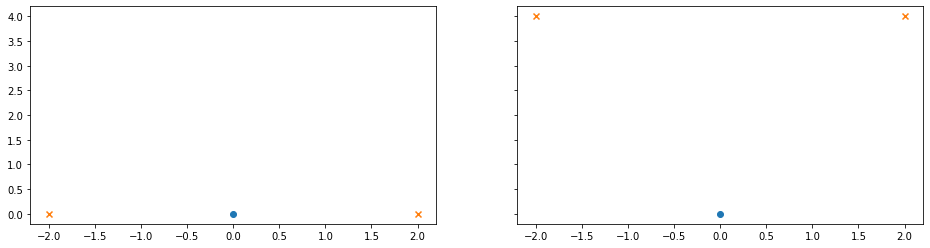

In [71]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
x0 = np.array([-2, 0, 2])
x1 = np.zeros(x0.shape[0])

y0_indices = np.array([1])
y1_indices = np.delete(np.arange(x1.shape[0]), y0_indices)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 4], sharey=True)
ax1.scatter(x0[y0_indices], x1[y0_indices], marker='o')
ax1.scatter(x0[y1_indices], x1[y1_indices], marker='x')

x1 = x0 ** 2

ax2.scatter(x0[y0_indices], x1[y0_indices], marker='o')
ax2.scatter(x0[y1_indices], x1[y1_indices], marker='x')

### Kernel function

If we have defined a feature mapping function $\Phi(\mathbf{x})$, we can apply it to SVM (and other machine learning models) by replacing every $\mathbf{x}$ by $\Phi(\mathbf{x})$ in all equations. Then we can find that in all equations of SVM (hard margin SVM, soft margin SVM and SVM inference), all transformed training instances $\Phi(\mathbf{x}_{i})$ are involved in the inner product (dot product) with another transformed $\Phi(\mathbf{x}_{j})$

Furthermore, given a feature mapping function $\Phi$, we define the corresponding **Kernel function** to be 

$$ K(\mathbf{x}_{1}, \mathbf{x}_{2}) = \Phi(\mathbf{x}_{1}) \cdot \Phi(\mathbf{x}_{2}) $$

Taking the SVM inference equation for an example, 

$$
\begin{aligned}
\operatorname{svm}(\mathbf{x}) & = \sum_{i \in \mathcal{S}} \alpha_{i}^{*} y_{i} \mathbf{x}_{i} \cdot \mathbf{x} + b^{*} \\
& = \sum_{i \in \mathcal{S}} \alpha_{i}^{*} y_{i} \Phi(\mathbf{x}_{i}) \cdot \Phi(\mathbf{x}) + b^{*} \\
& = \sum_{i \in \mathcal{S}} \alpha_{i}^{*} y_{i} K(\mathbf{x}_{i}, \mathbf{x}_{j}) + b^{*} \\
\end{aligned}
$$

we can see that we don't necessarily need to compute $\Phi(\mathbf{x})$ if we have a way to compute $K(\mathbf{x}_{i}, \mathbf{x}_{j})$ directly.
- The assumption here is that computing $\Phi(\mathbf{x})$ can be quite expensive if the output is an extremely high dimensional vector.

## Reference
---

1. https://people.eecs.berkeley.edu/~elghaoui/Teaching/EE227A/lecture7.pdf
1. https://www.stat.cmu.edu/~ryantibs/convexopt-F16/scribes/kkt-scribed.pdf
1. https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/
1. https://cse.iitkgp.ac.in/~dsamanta/courses/da/resources/slides/10SupportVectorMachine.pdf
1. https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf
1. https://www-ai.cs.tu-dortmund.de/LEHRE/SEMINARE/SS09/AKTARBEITENDESDM/LITERATUR/PlattSMO.pdf